**EXAMEN CLUSTERING MASTER 1 INFORMATIQUE**

*Lansana CISSE*
*Juah DIEGO ALFONSO*

In [97]:
# Importation des library
import pandas as pd
import numpy as np
from sklearn import metrics

# **1. Importation des données**

In [98]:
df = pd.read_csv('https://raw.githubusercontent.com/jdalfons/Clustering_univ/main/Test_Binome/ex_binome/clients_achats.csv', sep=';')

# **2. Exploration des données**

In [99]:
# Connaître les quantités des données
print(f'Shape of DF: {df.shape} \n')

Shape of DF: (20000, 10) 



Dans ce jeux données importé, nous voyons qu'il y'a dix variables et 20000 individus.


In [100]:
# Information des types de données
print(f'Info: {df.info()} \n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Numero          20000 non-null  int64 
 1   Marital Status  20000 non-null  object
 2   Gender          20000 non-null  object
 3   Yearly Income   20000 non-null  int64 
 4   Children        20000 non-null  int64 
 5   Education       20000 non-null  object
 6   Occupation      20000 non-null  object
 7   Home Owner      20000 non-null  object
 8   Cars            20000 non-null  int64 
 9   Age             20000 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.5+ MB
Info: None 



Dans ce jeux données nous avons deux types de variables (quantititves et qualitatives

In [101]:
# Afficher la liste des differentes variables
print(f'Columns: {df.columns} \n')

Columns: Index(['Numero', 'Marital Status', 'Gender', 'Yearly Income', 'Children',
       'Education', 'Occupation', 'Home Owner', 'Cars', 'Age'],
      dtype='object') 



In [102]:
# Description des données
df.describe()

Numero  Yearly Income      Children         Cars          Age
count  20000.000000   20000.000000  20000.000000  20000.00000  20000.00000
mean   10000.500000   56113.000000      1.113500      1.66350     45.24680
std     5773.647028   32057.021284      1.603168      1.12904     12.06174
min        1.000000   10000.000000      0.000000      0.00000     25.00000
25%     5000.750000   30000.000000      0.000000      1.00000     35.00000
50%    10000.500000   60000.000000      0.000000      2.00000     44.00000
75%    15000.250000   70000.000000      2.000000      2.00000     54.00000
max    20000.000000  170000.000000      5.000000      4.00000     96.00000

Nous avons observé des disparités dans les mesures des données et nous prévoyons d'appliquer des techniques de traitement des données pour normaliser l'ensemble des variables.

# **3. Prétraitement des données**



In [103]:
# supression de la variable Numero
df = df.drop("Numero", axis = 1)
# les premieres variables
df.head()

Marital Status  Gender  Yearly Income  Children        Education  \
0         Single    Male          30000         0  Partial College   
1        Married  Female          40000         0  Graduate Degree   
2        Married    Male         160000         5  Partial College   
3         Single    Male         160000         0  Graduate Degree   
4         Single  Female          70000         2        Bachelors   

       Occupation Home Owner  Cars  Age  
0        Clerical         No     1   33  
1        Clerical        Yes     0   37  
2    Professional         No     3   55  
3      Management        Yes     2   47  
4  Skilled Manual         No     1   38

In [104]:
# separtatiion des données par categorie

# variable qualitative
vars_quali = df.select_dtypes(include=['object'])

# variable quantitative
vars_quanti = df.select_dtypes(exclude=['object'])


In [105]:
# Observons les données qualitative
vars_quali.head()

Marital Status  Gender        Education      Occupation Home Owner
0         Single    Male  Partial College        Clerical         No
1        Married  Female  Graduate Degree        Clerical        Yes
2        Married    Male  Partial College    Professional         No
3         Single    Male  Graduate Degree      Management        Yes
4         Single  Female        Bachelors  Skilled Manual         No

In [106]:
# Observons les données quantitatives
vars_quanti.head()

Yearly Income  Children  Cars  Age
0          30000         0     1   33
1          40000         0     0   37
2         160000         5     3   55
3         160000         0     2   47
4          70000         2     1   38

In [107]:
# traitement des variables quantitatives
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
ZQuanti = pd.DataFrame(std.fit_transform(vars_quanti),index=vars_quanti.index,columns=vars_quanti.columns)

In [108]:
#vérification
print(ZQuanti.mean(axis=0))
print(ZQuanti.std(axis=0,ddof=0))

Yearly Income    2.273737e-17
Children         3.552714e-17
Cars             2.842171e-18
Age             -1.989520e-17
dtype: float64
Yearly Income    1.0
Children         1.0
Cars             1.0
Age              1.0
dtype: float64


In [109]:
# Traitement des variables qualitatives
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
MQuali = ohe.fit_transform(vars_quali)

In [110]:
#type de la structure
print(type(MQuali))

<class 'numpy.ndarray'>


In [111]:
#liste des colonnes
ohe.get_feature_names_out()

array(['Marital Status_Married', 'Marital Status_Single', 'Gender_Female',
       'Gender_Male', 'Education_Bachelors', 'Education_Graduate Degree',
       'Education_High School', 'Education_Partial College',
       'Education_Partial High School', 'Occupation_Clerical',
       'Occupation_Management', 'Occupation_Manual',
       'Occupation_Professional', 'Occupation_Skilled Manual',
       'Home Owner_No', 'Home Owner_Yes'], dtype=object)

In [112]:
#transformation en data frame Pandas
MQuali = pd.DataFrame(MQuali,index=vars_quali.index,columns=ohe.get_feature_names_out())

#information
MQuali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Marital Status_Married         20000 non-null  float64
 1   Marital Status_Single          20000 non-null  float64
 2   Gender_Female                  20000 non-null  float64
 3   Gender_Male                    20000 non-null  float64
 4   Education_Bachelors            20000 non-null  float64
 5   Education_Graduate Degree      20000 non-null  float64
 6   Education_High School          20000 non-null  float64
 7   Education_Partial College      20000 non-null  float64
 8   Education_Partial High School  20000 non-null  float64
 9   Occupation_Clerical            20000 non-null  float64
 10  Occupation_Management          20000 non-null  float64
 11  Occupation_Manual              20000 non-null  float64
 12  Occupation_Professional        20000 non-null 

In [113]:
#proportions
MQuali.describe()

Marital Status_Married  Marital Status_Single  Gender_Female  \
count            20000.000000           20000.000000   20000.000000   
mean                 0.567300               0.432700       0.488700   
std                  0.495462               0.495462       0.499885   
min                  0.000000               0.000000       0.000000   
25%                  0.000000               0.000000       0.000000   
50%                  1.000000               0.000000       0.000000   
75%                  1.000000               1.000000       1.000000   
max                  1.000000               1.000000       1.000000   

        Gender_Male  Education_Bachelors  Education_Graduate Degree  \
count  20000.000000         20000.000000                20000.00000   
mean       0.511300             0.257800                    0.16350   
std        0.499885             0.437434                    0.36983   
min        0.000000             0.000000                    0.00000   
25%        0.000000             0.000000                    0.00000   
50%        1.000000             0.000000                    0.00000   
75%        1.000000             1.000000                    0.00000   
max        1.000000             1.000000                    1.00000   

       Education_High School  Education_Partial College  \
count           20000.000000               20000.000000   
mean                0.197900                   0.269800   
std                 0.398426                   0.443867   
min                 0.000000                   0.000000   
25%                 0.000000                   0.000000   
50%                 0.000000                   0.000000   
75%                 0.000000                   1.000000   
max                 1.000000                   1.000000   

       Education_Partial High School  Occupation_Clerical  \
count                    20000.00000         20000.000000   
mean                         0.11100             0.142300   
std                          0.31414             0.349366   
min                          0.00000             0.000000   
25%                          0.00000             0.000000   
50%                          0.00000             0.000000   
75%                          0.00000             0.000000   
max                          1.00000             1.000000   

       Occupation_Management  Occupation_Manual  Occupation_Professional  \
count           20000.000000       20000.000000             20000.000000   
mean                0.173000           0.139900                 0.295300   
std                 0.378257           0.346892                 0.456189   
min                 0.000000           0.000000                 0.000000   
25%                 0.000000           0.000000                 0.000000   
50%                 0.000000           0.000000                 0.000000   
75%                 0.000000           0.000000                 1.000000   
max                 1.000000           1.000000                 1.000000   

       Occupation_Skilled Manual  Home Owner_No  Home Owner_Yes  
count               20000.000000   20000.000000    20000.000000  
mean                    0.249500       0.322100        0.677900  
std                     0.432734       0.467293        0.467293  
min                     0.000000       0.000000        0.000000  
25%                     0.000000       0.000000        0.000000  
50%                     0.000000       0.000000        1.000000  
75%                     0.000000       1.000000        1.000000  
max                     1.000000       1.000000        1.000000

In [114]:
#préparation
import numpy
ZQuali = MQuali/numpy.sqrt(MQuali.mean(axis=0))
ZQuali.describe()

Marital Status_Married  Marital Status_Single  Gender_Female  \
count            20000.000000           20000.000000   20000.000000   
mean                 0.753193               0.657799       0.699071   
std                  0.657816               0.753212       0.715070   
min                  0.000000               0.000000       0.000000   
25%                  0.000000               0.000000       0.000000   
50%                  1.327681               0.000000       0.000000   
75%                  1.327681               1.520220       1.430470   
max                  1.327681               1.520220       1.430470   

        Gender_Male  Education_Bachelors  Education_Graduate Degree  \
count  20000.000000         20000.000000               20000.000000   
mean       0.715052             0.507740                   0.404351   
std        0.699088             0.861532                   0.914627   
min        0.000000             0.000000                   0.000000   
25%        0.000000             0.000000                   0.000000   
50%        1.398499             0.000000                   0.000000   
75%        1.398499             1.969512                   0.000000   
max        1.398499             1.969512                   2.473097   

       Education_High School  Education_Partial College  \
count           20000.000000               20000.000000   
mean                0.444860                   0.519423   
std                 0.895623                   0.854539   
min                 0.000000                   0.000000   
25%                 0.000000                   0.000000   
50%                 0.000000                   0.000000   
75%                 0.000000                   1.925214   
max                 2.247901                   1.925214   

       Education_Partial High School  Occupation_Clerical  \
count                   20000.000000         20000.000000   
mean                        0.333167             0.377227   
std                         0.942892             0.926144   
min                         0.000000             0.000000   
25%                         0.000000             0.000000   
50%                         0.000000             0.000000   
75%                         0.000000             0.000000   
max                         3.001501             2.650926   

       Occupation_Management  Occupation_Manual  Occupation_Professional  \
count           20000.000000       20000.000000             20000.000000   
mean                0.415933           0.374032                 0.543415   
std                 0.909418           0.927439                 0.839485   
min                 0.000000           0.000000                 0.000000   
25%                 0.000000           0.000000                 0.000000   
50%                 0.000000           0.000000                 0.000000   
75%                 0.000000           0.000000                 1.840214   
max                 2.404235           2.673567                 1.840214   

       Occupation_Skilled Manual  Home Owner_No  Home Owner_Yes  
count               20000.000000   20000.000000    20000.000000  
mean                    0.499500       0.567539        0.823347  
std                     0.866336       0.823367        0.567553  
min                     0.000000       0.000000        0.000000  
25%                     0.000000       0.000000        0.000000  
50%                     0.000000       0.000000        1.214555  
75%                     0.000000       1.761995        1.214555  
max                     2.002003       1.761995        1.214555

In [115]:
#réunir les deux bases
Z = pd.concat([ZQuanti,ZQuali],axis=1)
Z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Yearly Income                  20000 non-null  float64
 1   Children                       20000 non-null  float64
 2   Cars                           20000 non-null  float64
 3   Age                            20000 non-null  float64
 4   Marital Status_Married         20000 non-null  float64
 5   Marital Status_Single          20000 non-null  float64
 6   Gender_Female                  20000 non-null  float64
 7   Gender_Male                    20000 non-null  float64
 8   Education_Bachelors            20000 non-null  float64
 9   Education_Graduate Degree      20000 non-null  float64
 10  Education_High School          20000 non-null  float64
 11  Education_Partial College      20000 non-null  float64
 12  Education_Partial High School  20000 non-null 

In [116]:
#acp
from sklearn.decomposition import PCA
afdm = PCA(svd_solver='full')
coordFact = afdm.fit_transform(Z)

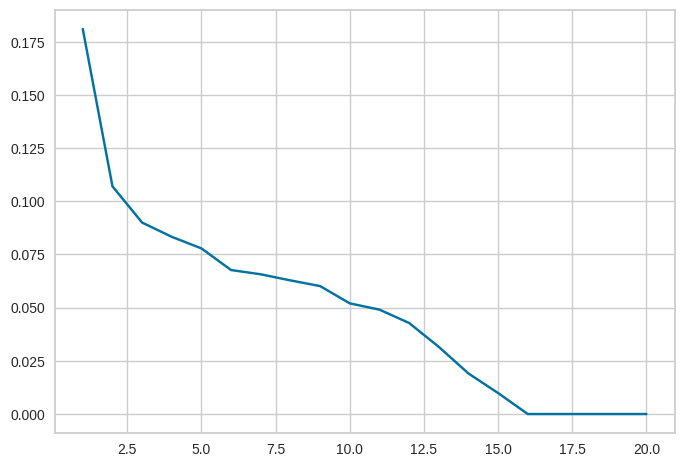

In [117]:
#courbe screeplot
import matplotlib.pyplot as plt
import numpy
plt.plot(numpy.arange(1,afdm.n_components_+1,1),afdm.explained_variance_ratio_)

In [118]:
#variance expliquée par les premières composantes
numpy.cumsum(afdm.explained_variance_ratio_)

array([0.18099639, 0.28805361, 0.37805871, 0.46136092, 0.53921886,
       0.60690609, 0.67259579, 0.73541861, 0.79557034, 0.8475941 ,
       0.89667187, 0.93947841, 0.97106097, 0.99013758, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

Nous allons prendre 5 facteurs qui expliquent 50% des données

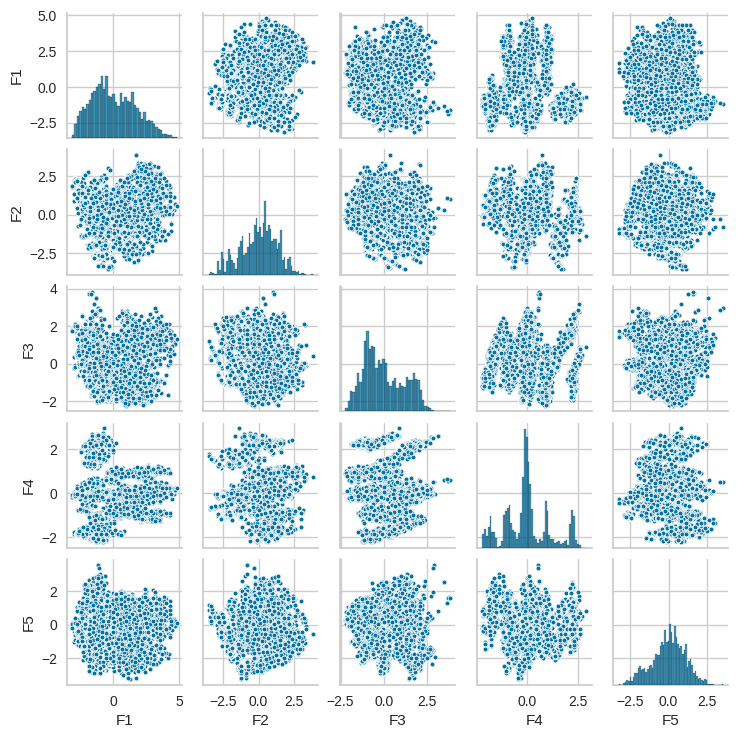

In [119]:
#transformer en data frame les coordonnées
dfFact = pd.DataFrame(coordFact[:,:5],columns=['F'+str(i) for i in range(1,6)])

#scatter matrix
import seaborn as sns
sns.pairplot(dfFact,height=1.5,markers='.')

# **4. Choix du nombre de clusters**

In [120]:
from sklearn.cluster import KMeans
cluster_kmeans = KMeans(n_clusters=4, random_state=0)
cluster_kmeans.fit(dfFact)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(n_init=10),k=(1,11),metric='distortion')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method showing the optimal k')
visualizer.fit(dfFact)
visualizer.show()

Après avoir appliqué la méthode "Elbow" de Yellowbrick pour déterminer le nombre optimal de clusters, nous avons observé un point d'inflexion distinct lorsque nous avons utilisé cinq clusters.

In [ ]:
# Mesurons les performances des modeles

# Sachant que yellowbrick nous a proposé 5, nous alllons construire un nouvel modele et les comparer
from sklearn.cluster import KMeans
cluster_kmeans_evaluation = KMeans(n_clusters=5, random_state=0)
cluster_kmeans_evaluation.fit(dfFact)

In [ ]:
# Inerties totale

XC = dfFact - np.mean(dfFact, axis=0)
CARDIST = np.sum(XC**2, axis=1)
TSS = np.sum(CARDIST)
print('TSS = ',TSS)

In [ ]:
# Inerties expliques
print((TSS - cluster_kmeans.inertia_)/TSS)
print((TSS - cluster_kmeans_evaluation.inertia_)/TSS)

In [ ]:
# calinski_harabasz
print(metrics.calinski_harabasz_score(dfFact, cluster_kmeans.labels_))
print(metrics.calinski_harabasz_score(dfFact, cluster_kmeans_evaluation.labels_))

In [ ]:
# silhouette
print(metrics.silhouette_score(dfFact, cluster_kmeans.labels_))
print(metrics.silhouette_score(dfFact, cluster_kmeans_evaluation.labels_))

Après avoir construit et comparé cinq modèles de clustering avec cinq clusters chacun, nous avons constaté une amélioration de la performance pour chaque méthode, soulignant ainsi la pertinence des cinq clusters dans la représentation de nos données.

# **5. Construction du modèle finale**

In [ ]:
from sklearn.cluster import KMeans
fKmeans = KMeans(n_clusters=5, random_state=0)
fKmeans.fit(dfFact)

In [ ]:
#classes d'appartenance des individus
fKmeans.labels_

In [ ]:
#groupe d'appartenance associé aux noms des modèles
pd.DataFrame(fKmeans.labels_,index=dfFact.index)

In [ ]:
#effectifs par classe
numpy.unique(fKmeans.labels_,return_counts=True)

In [ ]:
dfFact.head()

In [ ]:
dfFact['groupes'] = cluster_kmeans.labels_

#graphique

sns.scatterplot(dfFact,x='F1',y='F2',hue='groupes',palette=['coral','darkseagreen','cornflowerblue','yellow'],alpha=0.8)


# Afficher une paire de tracés pour visualiser les relations entre les facteurs

sns.pairplot(dfFact, hue='groupes', palette=['coral', 'darkseagreen', 'cornflowerblue'])

plt.show()

# **6. Création d'un pipeline**

In [ ]:
from sklearn import cluster
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

wkf = Pipeline([('cr',StandardScaler()),
                ('pca',PCA(n_components=5,svd_solver='full')),
                ('cm',KMeans(n_clusters=5,random_state=0))])


# **7. Sauvegarde du modele**

In [ ]:
#pickle
import pickle

#ouvrir le fichier en écriture
f = open("workflow.sav","wb")

#sérialisation
pickle.dump(wkf,f)

#fermer le fichier
f.close()